In [26]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import os
import requests

In [35]:
#Nhập chủ đề
subject = "doraemon"

In [ ]:
# Function to download images
def download_images():
    images = driver.find_elements(By.XPATH, '//img[contains(@id, "dimg")]')
    for index, img in enumerate(images):
        img_src = img.get_attribute('src')
        if img_src:
            try:
                # Send HTTP GET request to fetch the image
                response = requests.get(img_src)
                if response.status_code == 200:
                    # Save the image to the folder
                    img_name = f"{download_folder}/image_{index + 1}.jpg"
                    with open(img_name, 'wb') as file:
                        file.write(response.content)
                    print(f"Downloaded image: {img_name}")
            except Exception as e:
                print(f"Failed to download image {index + 1}: {e}")

Failed to download image 1: No connection adapters were found for ''
Failed to download image 2: No connection adapters were found for ''
Failed to download image 3: No connection adapters were found for ''
Failed to download image 4: No connection adapters were found for ''
Failed to download image 5: No connection adapters were found for ''
Downloaded image: downloaded_images/image_6.jpg
Downloaded image: downloaded_images/image_7.jpg
Downloaded image: downloaded_images/image_8.jpg
Downloaded image: downloaded_images/image_9.jpg
Failed to download image 10: No connection adapters were found for 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='
Failed to download image 11: No connection adapters were found for 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='
Failed to download image 12: No connection adapters were found for ''
Failed to download image 13: No connection adapters were found for 'data:image/png;base64
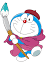
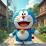
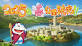
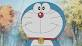
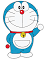
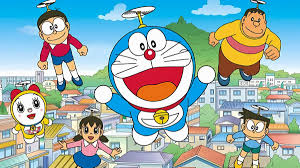
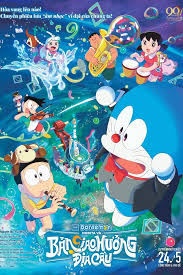
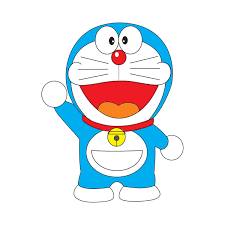
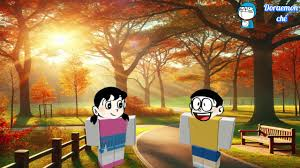
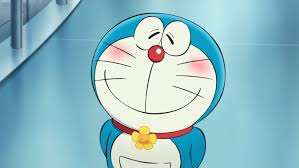
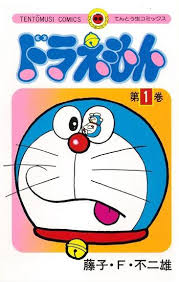
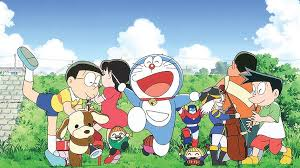
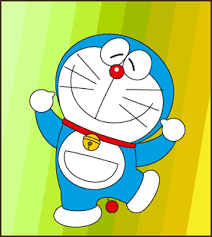
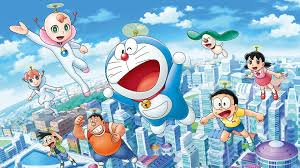
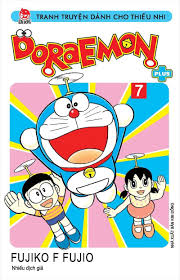
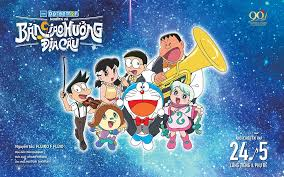
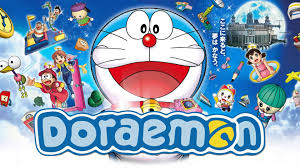
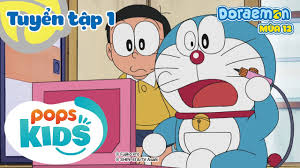
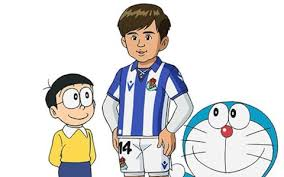
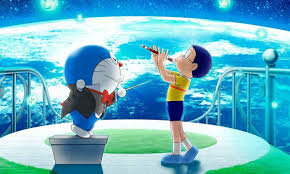
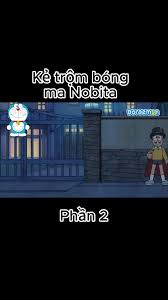
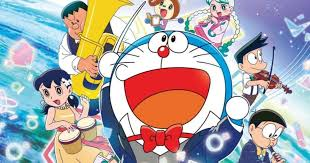
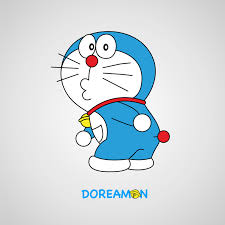
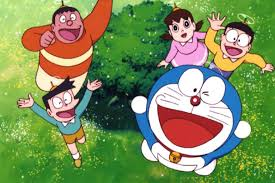
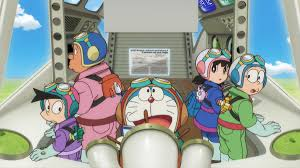
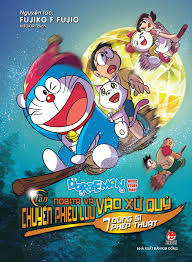
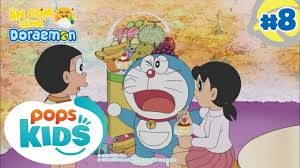
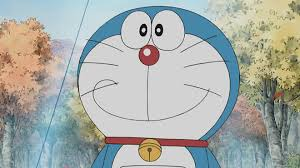
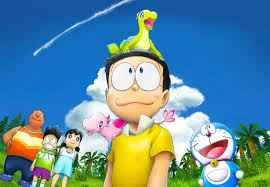
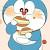
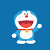
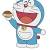
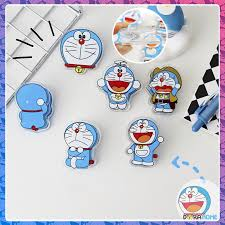
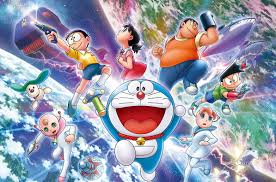
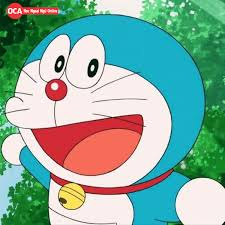
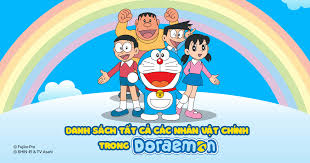
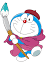
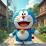
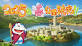
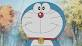
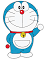
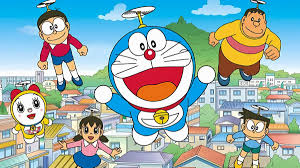
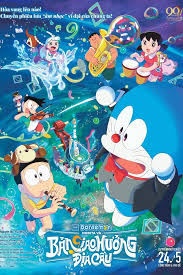
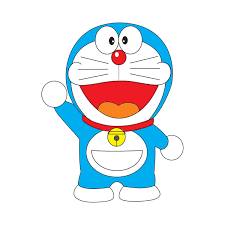
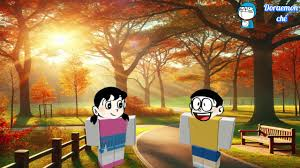
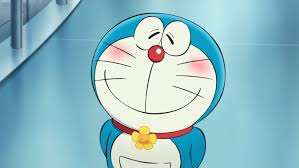
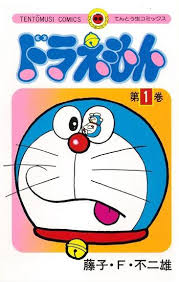
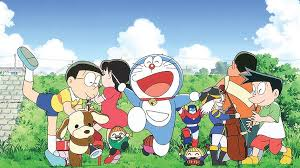
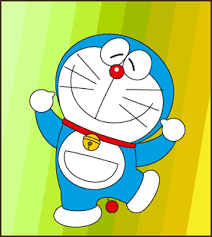
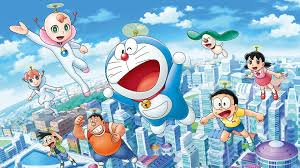
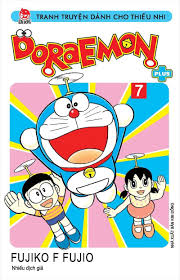
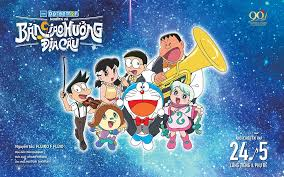
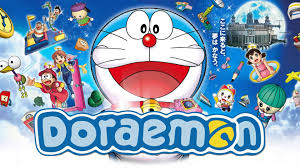
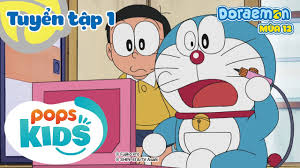
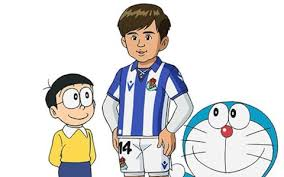
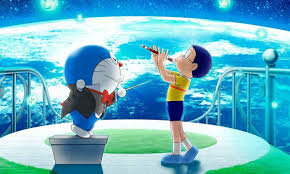
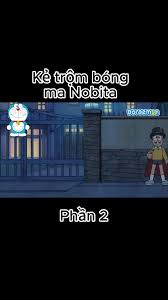
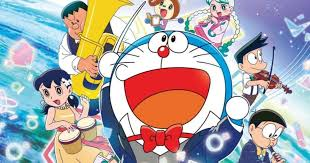
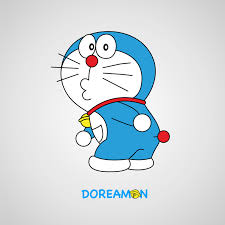
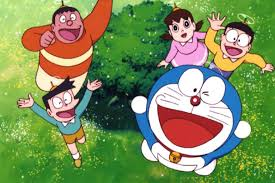
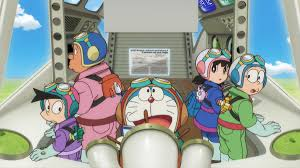
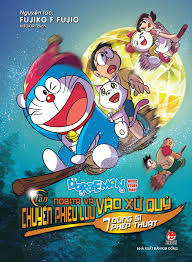
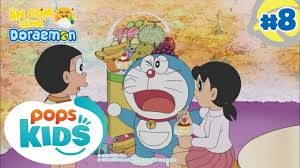
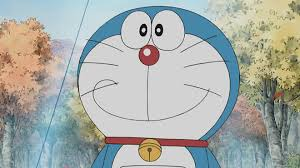
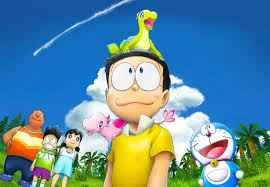
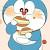
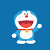
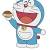
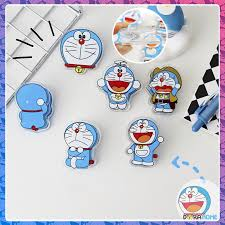
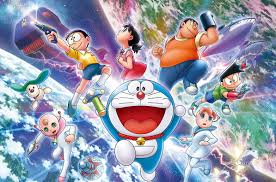
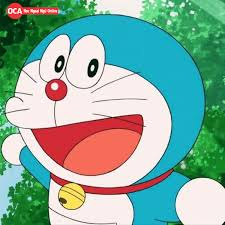
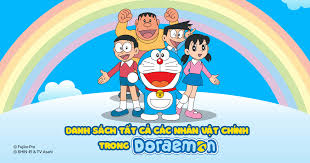
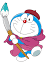
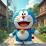
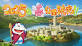
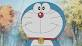
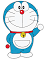
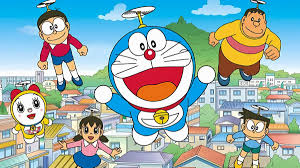
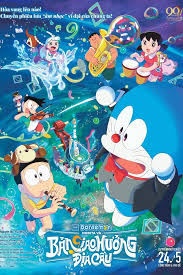
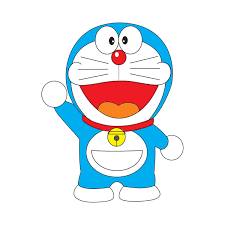
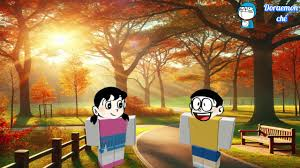
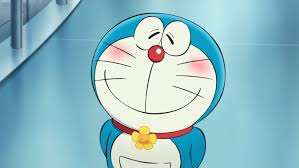
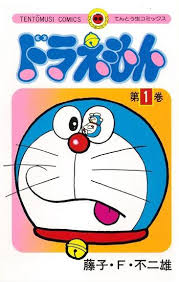
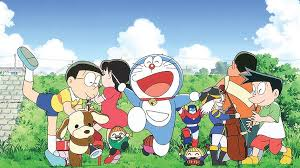
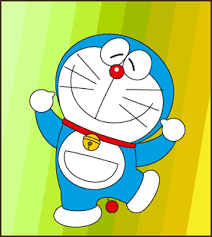
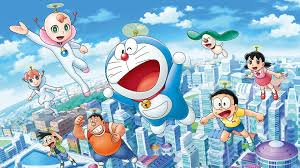
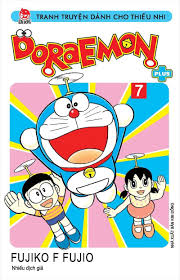
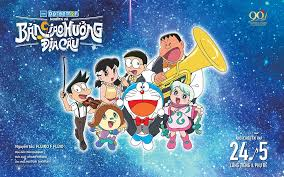
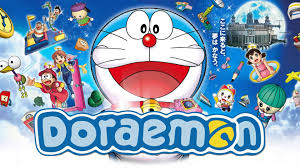
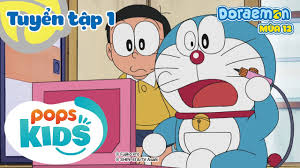
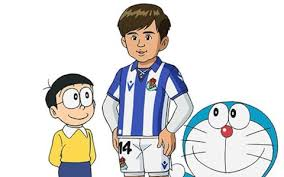
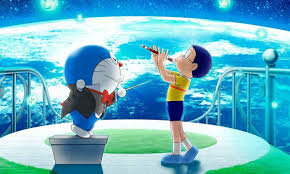
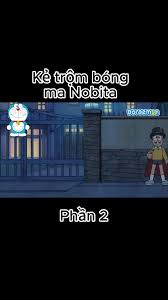
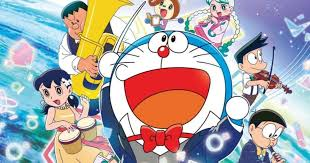
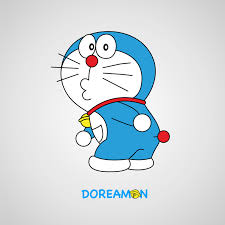
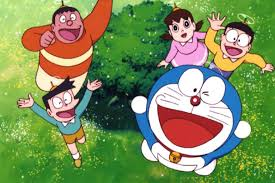
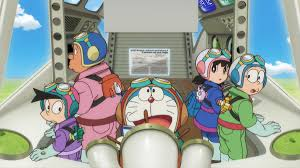
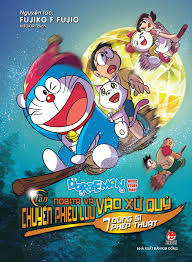
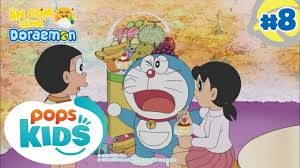
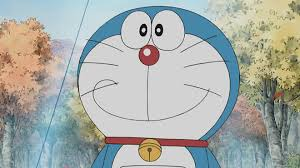
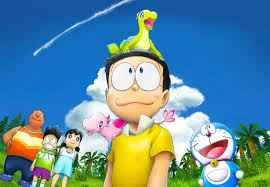
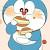
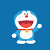
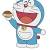
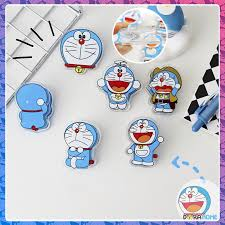
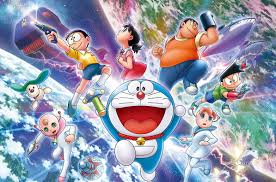
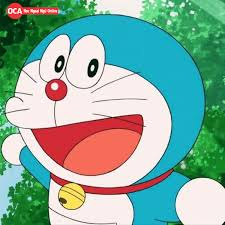
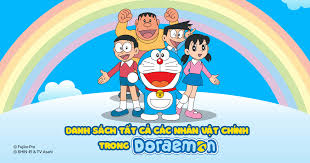
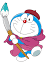
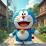
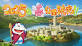
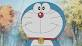
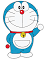
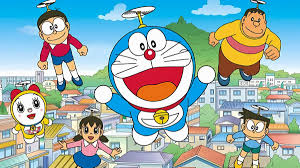
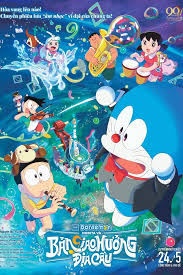
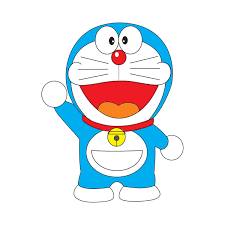
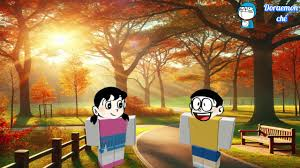
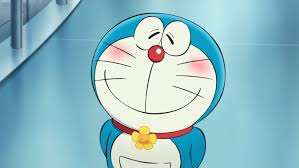
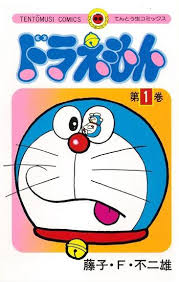
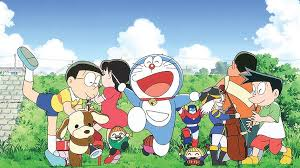
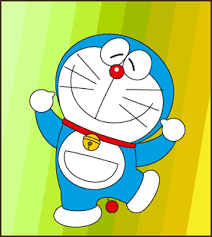
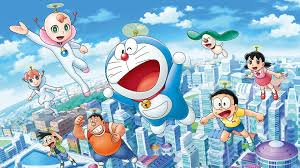
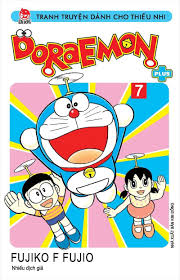
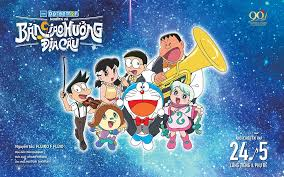
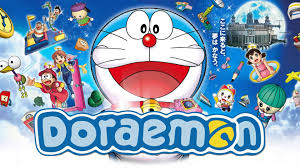
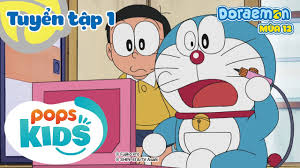
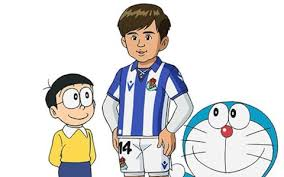
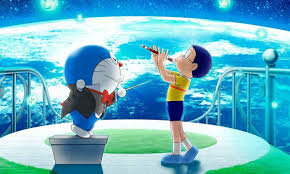
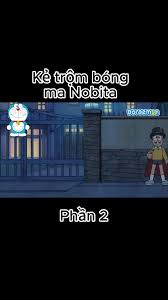
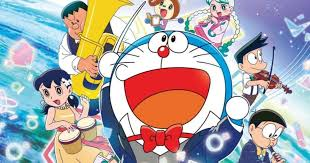
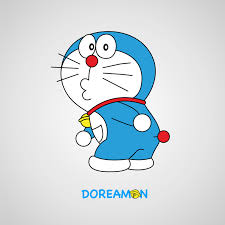
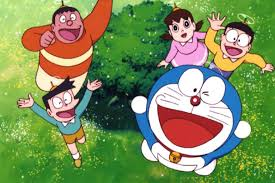
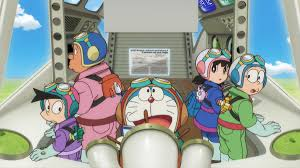
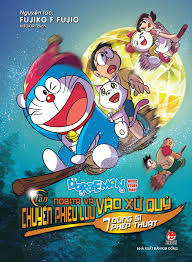
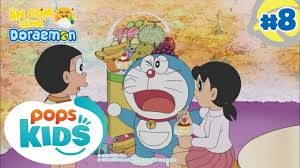
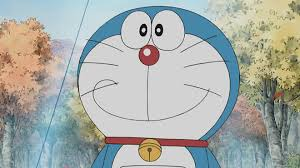
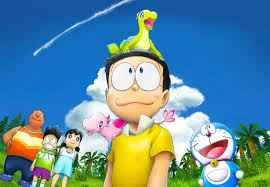
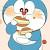
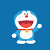
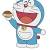
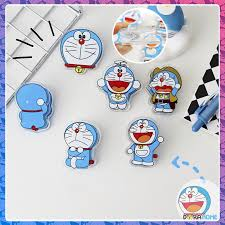
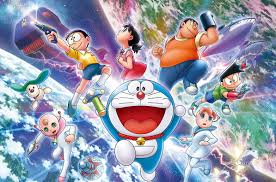
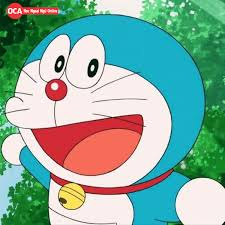
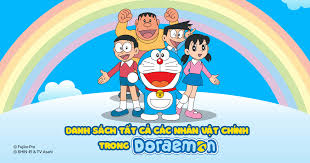
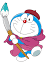
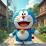
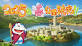
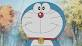
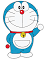
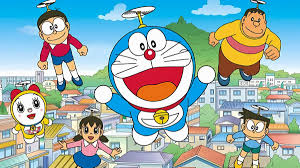
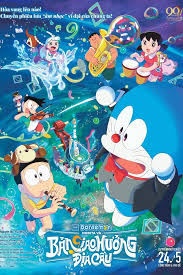
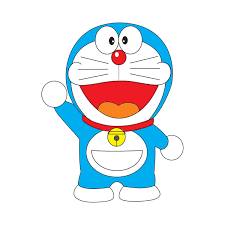
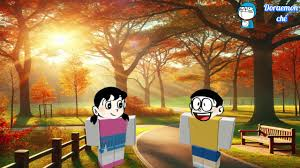
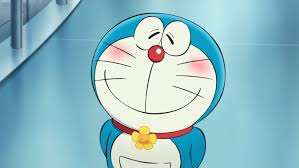
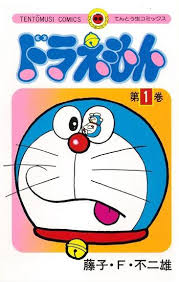
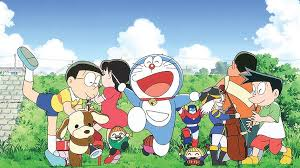
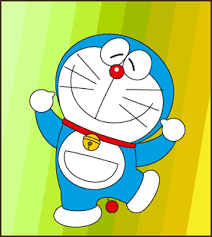
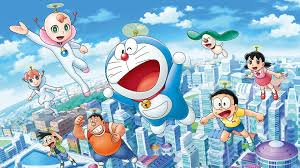
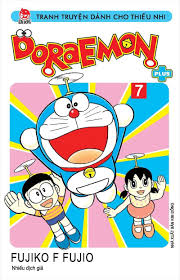
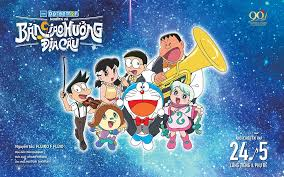
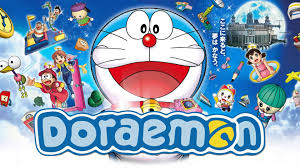
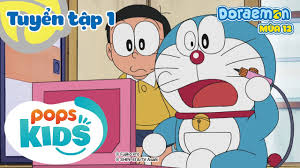
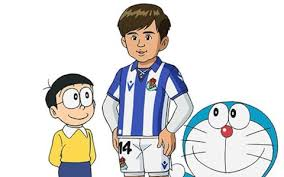
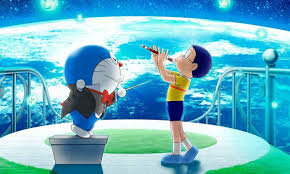
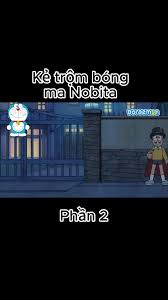
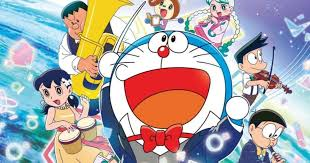
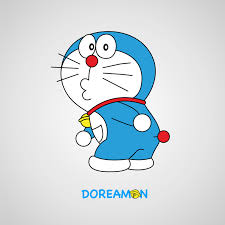
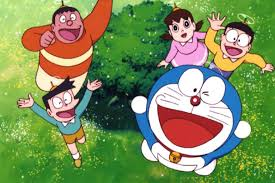
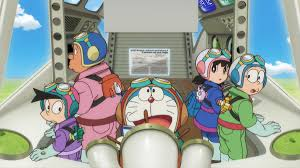
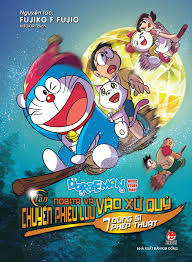
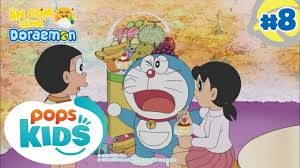
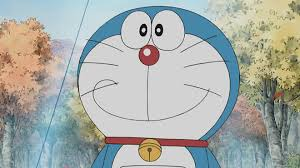
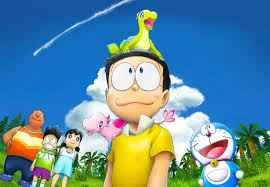
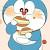
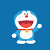
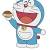
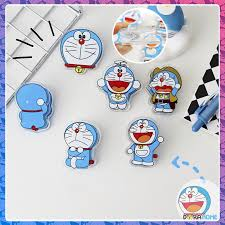
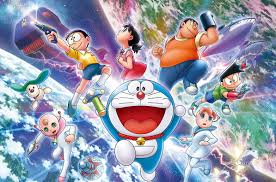
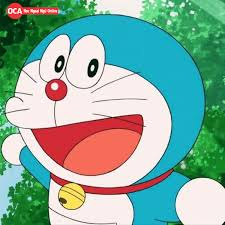
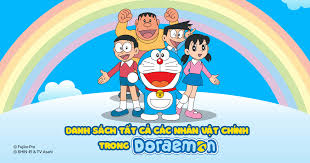

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=132.0.6834.111)
Stacktrace:
	GetHandleVerifier [0x00007FF7A152CC05+28741]
	(No symbol) [0x00007FF7A148FED0]
	(No symbol) [0x00007FF7A1324FBA]
	(No symbol) [0x00007FF7A12FED55]
	(No symbol) [0x00007FF7A13A6DE7]
	(No symbol) [0x00007FF7A13BF8B2]
	(No symbol) [0x00007FF7A139FBD3]
	(No symbol) [0x00007FF7A1369F43]
	(No symbol) [0x00007FF7A136B2D1]
	GetHandleVerifier [0x00007FF7A185DE3D+3375741]
	GetHandleVerifier [0x00007FF7A187096A+3452330]
	GetHandleVerifier [0x00007FF7A186671D+3410781]
	GetHandleVerifier [0x00007FF7A15F653B+854395]
	(No symbol) [0x00007FF7A149BE0F]
	(No symbol) [0x00007FF7A1497714]
	(No symbol) [0x00007FF7A14978AD]
	(No symbol) [0x00007FF7A1486189]
	BaseThreadInitThunk [0x00007FFB6649259D+29]
	RtlUserThreadStart [0x00007FFB67FEAF38+40]


In [36]:
website = (
    "https://www.google.com.vn/search?sca_esv=8b8c4f88fc4c1aa0&sxsrf="
    "AHTn8zpwOQpMqikOUDLIoHrv0DFgiyJAmg:1738053518492&q="
    + subject
    + "&udm=2&fbs="
    "ABzOT_AfCikcO6SgGMxZXxAG9tmS8rx53CbgOCSVg3O9Xo5xAK_RXi3VFy8QcDJV9F46BNX0"
    "kZcBdv2qiG8279sznoGvwXYVfqXi5AxPvDXkJ-MkwThOeWf1fl0-vP_stZw2-wiFo2_fcg96r"
    "RhBCMfKN9fd7eIVFeeEix-moWmSapYEMEksBbaReod_JR2StsZ_J6rZI-OtKz6sLewu_ahkl0"
    "bzIipJiM2sgx0UvR4EsxPbUSRk_Cs&sa=X&ved=2ahUKEwiv38f0gZiLAxUTia8BHcJiFagQtKgLegQIERAB"
)

# Define the path to the ChromeDriver
chromedriver_path = "chromedriver-win64/chromedriver-win64/chromedriver.exe"

# Create a service object
service = Service(chromedriver_path)

# Initialize the Chrome driver
driver = webdriver.Chrome(service=service)

# Open the URL
driver.get(website)

# Maximize the browser window
driver.maximize_window()

# Wait for images to load
WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.TAG_NAME, 'img')))

# Define a folder to store downloaded images
download_folder = "downloaded_images"
if not os.path.exists(download_folder):
    os.makedirs(download_folder)

# Start downloading images
download_images()

# Scroll down until no new images are loaded
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # Wait for new images to load

    # Download images after scrolling
    download_images()

    # Check the new height of the page
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        print("No more new images.")
        break
    last_height = new_height

# Close the browser
driver.quit()
